In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
import os
for dirname, _, filenames in os.walk('spam.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Load dataset

In [33]:
df = pd.read_csv("spam.csv", index_col = None,  encoding='latin')
df = df.iloc[ : , 0 : 2]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Check the distribution of Ham/Spam messages

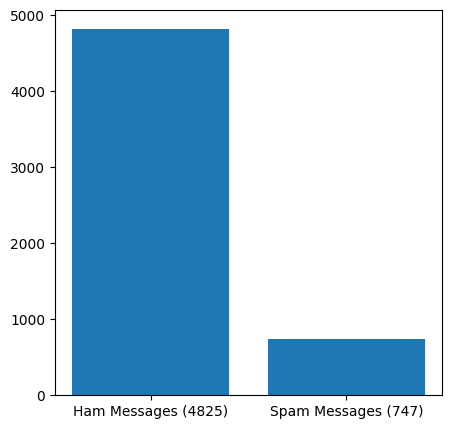

In [34]:
ham_count = int(df['v1'].loc[df['v1'] == 'ham'].count())
spam_count = int(df['v1'].loc[df['v1'] == 'spam'].count())
names = ['Ham Messages (' + str(ham_count) + ')', 'Spam Messages (' + str(spam_count) + ')']
counts = [ham_count, spam_count]
plt.figure(figsize=(5, 5))
plt.bar(names, counts)
plt.show()

In [35]:
# Labeling target variable (prediction)
# Ham/Non-Spam messages = 0
# Spam messages = 1
df['v1'] = df['v1'].map({
    'ham' : 0,
    'spam' : 1
    })

### Text cleaning (remove punctuations and special characters)

In [36]:
def clean_text(message):
    text = message.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['v2'] = df['v2'].apply(lambda x: clean_text(x))
df

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the time we have tried contact u u h...
5568,0,will ì b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


### Split dataset (train and test set)

In [37]:
x = df['v2']
y = df['v1']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Vectorize the text into numerical form

In [38]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

Predicted values: 
 [0 0 1 ... 0 1 0]
Accuracy:  93.36 %
Confusion matrix: 


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


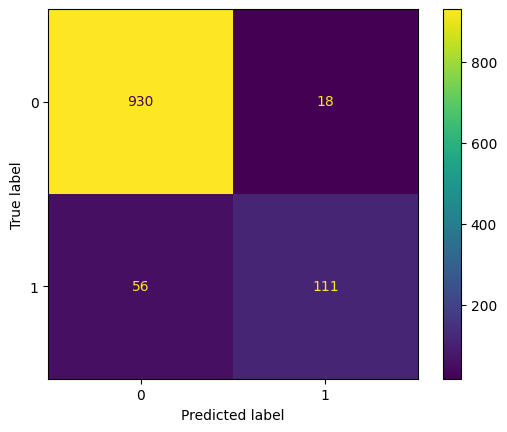

In [39]:
# DECISION TREE (GINI)
# Model training

model_dt_gini = DecisionTreeClassifier(criterion = "gini", random_state=123, max_depth=10, min_samples_leaf=8)
model_dt_gini.fit(xv_train, y_train)
# Model evaluation

y_pred = model_dt_gini.predict(xv_test)
model_dt_gini_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
print('Predicted values: \n', y_pred)
print('Accuracy: ', model_dt_gini_accuracy, '%')
print('Confusion matrix: \n', plot_confusion_matrix(model_dt_gini, xv_test, y_test))

Predicted values: 
 [0 0 0 ... 0 1 0]
Accuracy:  93.54 %
Confusion matrix: 


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


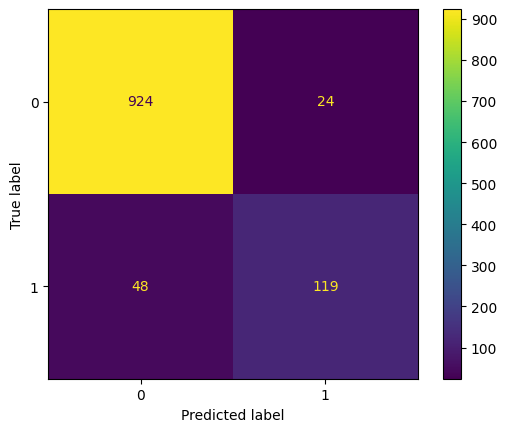

In [40]:
# DECISION TREE (ENTROPY)
# Model training

model_dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = 10, min_samples_leaf = 8)
model_dt_entropy.fit(xv_train, y_train)
# Model evaluation

y_pred = model_dt_entropy.predict(xv_test)
model_dt_entropy_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
print('Predicted values: \n', y_pred)
print('Accuracy: ', model_dt_entropy_accuracy, '%')
print('Confusion matrix: \n', plot_confusion_matrix(model_dt_entropy, xv_test, y_test))

Predicted values: 
 [0 0 1 ... 0 1 0]
Accuracy:  96.32 %
Confusion matrix: 


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


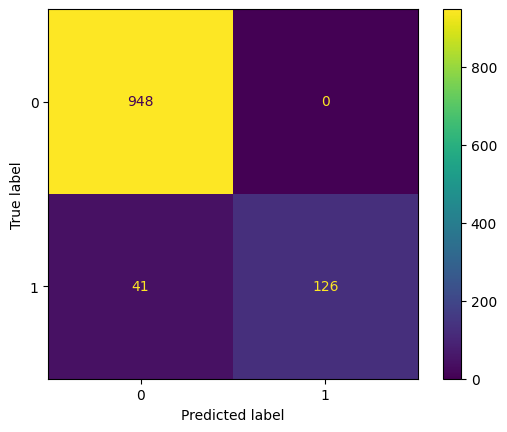

In [41]:
# LOGISTIC REGRESSION
# Model training

model_lr = LogisticRegression(random_state = 0)
model_lr.fit(xv_train, y_train)
# Model evaluation

y_pred = model_lr.predict(xv_test)
model_lr_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
print('Predicted values: \n', y_pred)
print('Accuracy: ', model_lr_accuracy, '%')
print('Confusion matrix: \n', plot_confusion_matrix(model_lr, xv_test, y_test))

Predicted values: 
 [0 0 1 ... 0 1 0]
Accuracy:  96.32 %
Confusion matrix: 


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


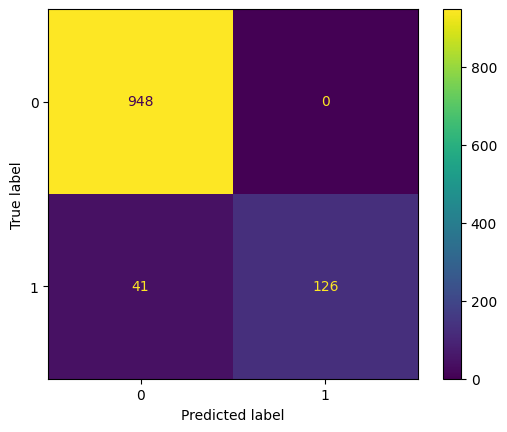

In [42]:
# RANDOM FOREST
# Model training
model_rf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
model_rf.fit(xv_train, y_train)
# Model evaluation
y_pred = model_rf.predict(xv_test)
model_rf_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
print('Predicted values: \n', y_pred)
print('Accuracy: ', model_rf_accuracy, '%')
print('Confusion matrix: \n', plot_confusion_matrix(model_rf, xv_test, y_test))

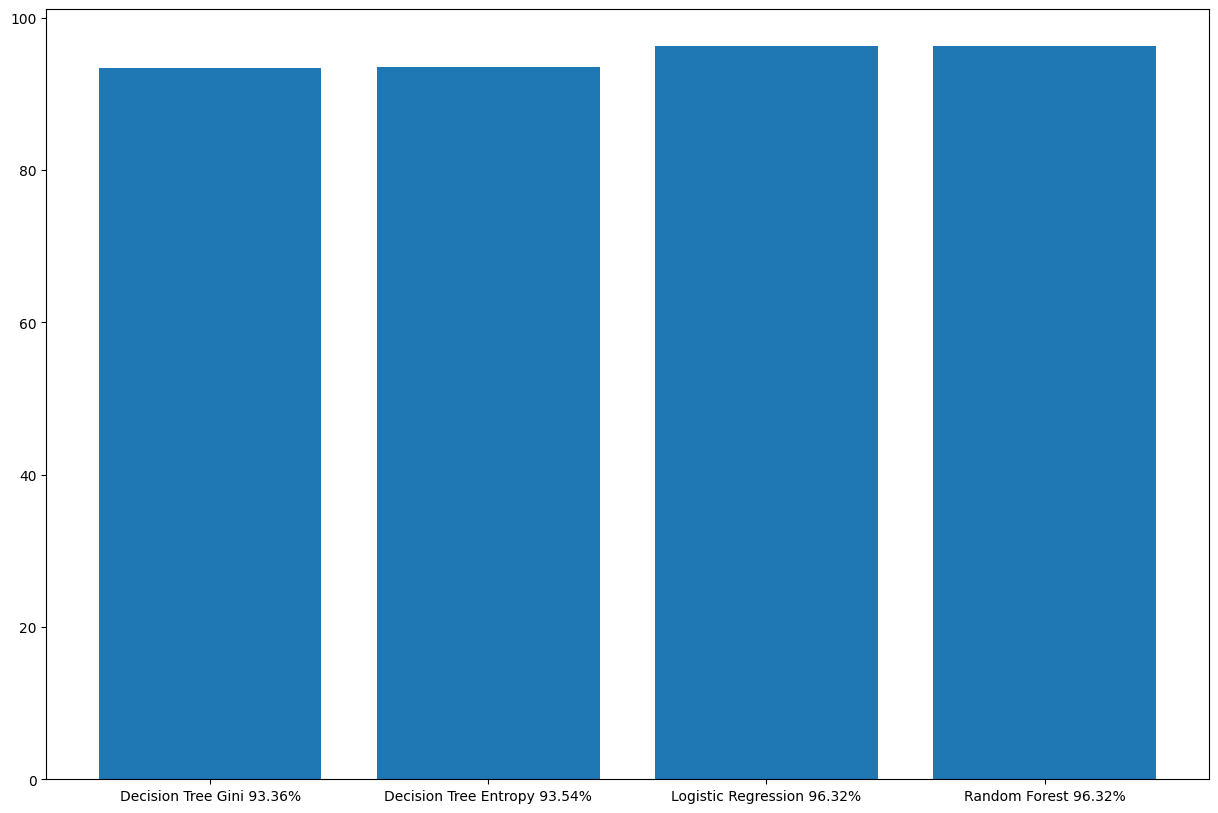

In [43]:
# Model Comparison
model_names = ['Decision Tree Gini ' + str(model_dt_gini_accuracy) + '%', 
               'Decision Tree Entropy ' + str(model_dt_entropy_accuracy) + '%', 
               'Logistic Regression ' + str(model_lr_accuracy) + '%', 'Random Forest ' + str(model_rf_accuracy) + '%']
model_accuracy = [model_dt_gini_accuracy, model_dt_entropy_accuracy, model_lr_accuracy, model_rf_accuracy]
plt.figure(figsize=(15, 10))
plt.bar(model_names, model_accuracy)
plt.show()

In [53]:
# Predict new text
new_text = "Buy 1 card get 1 free! Please kindly reply this email if you are interested. Thank you..."
# Vectorize the new text into numerical form
new_text_vector = vectorization.transform([new_text])
# Model prediction
model_dt_gini_pred = model_dt_gini.predict(new_text_vector)[0]
print('Decision Tree (Gini) model Prediction:')
print('Spam message' if model_dt_gini_pred==1 else 'Ham/non-spam message')
model_dt_entropy_pred = model_dt_entropy.predict(new_text_vector)[0]
print('Decision Tree (Entropy) model Prediction:')
print('Spam message' if model_dt_entropy_pred==1 else 'Ham/non-spam message')
model_lr_pred = model_lr.predict(new_text_vector)[0]
print('Logistic Regression Model Prediction:')
print('Spam message' if model_lr_pred==1 else 'Ham/non-spam message')
model_rf_pred = model_rf.predict(new_text_vector)[0]
print('Random Forest Model Prediction:')
print('Spam message' if model_rf_pred==1 else 'Ham/non-spam message')

Decision Tree (Gini) model Prediction:
Ham/non-spam message
Decision Tree (Entropy) model Prediction:
Ham/non-spam message
Logistic Regression Model Prediction:
Ham/non-spam message
Random Forest Model Prediction:
Ham/non-spam message
